# Feature Selection

In [173]:
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [5]:
#get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
dtype = {'Column29': 'str'}  # Replace 'Column29' with the actual column name that has mixed types

train = pd.read_csv(train_path, index_col='Claim Identifier', dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier', dtype=dtype, low_memory=False)


In [6]:
# drop all the rows that have missing values in Claim Injury Type
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_train, y_valid = train_test_split(X, y_int, test_size=0.2, random_state=0)

In [7]:
y_int = y.str[:1].astype(int)

In [8]:
y.value_counts(normalize=True)

Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258711
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021736
6. PPD NSL         0.007336
8. DEATH           0.000819
7. PTD             0.000169
Name: proportion, dtype: float64

In [9]:
sys.path.append('../Library')
from preProcesser import PreProcessor

In [10]:
prep1 = PreProcessor()
print(prep1)

version: 3.0 8 dec 17:08
encoder: OneHotEncoder()
scaler: RobustScaler()
start features: []
end features: []
cat features: []
num features: []
date features: []
dummy features: []
fe features: []
columns to frequency encode: []
columns to encode: ['Gender', 'Attorney/Representative', 'Carrier Type Code', 'First Hearing held']
columns to scale: []
columns to drop: []
columns dropped: []
columns to fillna: []
method to fillna: mean
file path for saving: ../Data


In [14]:
prep1.append_columns_to_freq_encode('District Name')

In [15]:
df_train = prep1.pipeline(X_train.copy(),
                          fit_scaler=True, set_end_features=True)

no start features
1)-------Numerical Features---------
log_Average Weekly Wage already in num features
IME-4 Count already in columns not to scale
IME-4 Count already in num features
2)-------Categorical Features---------
A) ---> dealing with the zip code
Zip Code already in code features
Alternative Dispute Resolution already in columns not to scale
Carrier Code_ already in columns not to scale
Carrier Code_ already in code features
2. ---> Carrier Type encoded in Carrier Type Code
'Country of Injury'
COVID-19 Indicator already in columns not to scale
COVID-19 Indicator already in dummy features
'District Code_'
Medical Fee Code_ already in columns not to scale
Medical Fee Code_ already in code features
Carrier Type Code already in columns not to scale
Carrier Type Code already in code features
Accident Year_ already in date features
Accident Month_ already in date features
Assembly Year_ already in date features
Assembly Month_ already in date features
C-2 Year_ already in date featu

/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/Notebooks/../Library/preProcesser.py:714: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.  -0.5  0.  ... -0.5  0.5  0. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, self.get_columns_to_scale()] = self.scaler.transform(df[self.get_columns_to_scale()])
/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/Notebooks/../Library/preProcesser.py:714: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.48200654 -0.25736096  0.14940022 ...  0.86259542 -0.20392585
 -0.5474373 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, self.get_columns_to_scale()] = self.scaler.transform(df[self.get_columns_to_scale()])
/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/N

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 5877274 to 5803696
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   459220 non-null  float64
 1   Alternative Dispute Resolution  459220 non-null  float64
 2   Birth Year                      459220 non-null  float64
 3   County of Injury                459220 non-null  object 
 4   COVID-19 Indicator              459220 non-null  int64  
 5   District Name                   459220 non-null  object 
 6   IME-4 Count                     459220 non-null  float64
 7   Industry Code                   459220 non-null  float64
 8   WCIO Cause of Injury Code       459220 non-null  float64
 9   WCIO Nature of Injury Code      459220 non-null  float64
 10  WCIO Part Of Body Code          459220 non-null  float64
 11  Zip Code                        459220 non-null  object 
 12  Agreement Reac

In [17]:
df_train['District Name']

Claim Identifier
5877274           NYC
5482355     ROCHESTER
5654730           NYC
6029178       BUFFALO
6108114           NYC
              ...    
5875495    BINGHAMTON
5598826           NYC
5550948     HAUPPAUGE
5979080        ALBANY
5803696           NYC
Name: District Name, Length: 459220, dtype: object

In [19]:
df_valid = prep1.pipeline(X_valid.copy(), set_end_features=False, fit_scaler=False)

no start features
1)-------Numerical Features---------
log_Average Weekly Wage already in num features
IME-4 Count already in columns not to scale
IME-4 Count already in num features
2)-------Categorical Features---------
A) ---> dealing with the zip code
Zip Code already in code features
Alternative Dispute Resolution already in columns not to scale
Carrier Code_ already in columns not to scale
Carrier Code_ already in code features
2. ---> Carrier Type encoded in Carrier Type Code
'Country of Injury'
COVID-19 Indicator already in columns not to scale
COVID-19 Indicator already in dummy features
'District Code_'
Medical Fee Code_ already in columns not to scale
Medical Fee Code_ already in code features
Carrier Type Code already in columns not to scale
Carrier Type Code already in code features
Accident Year_ already in date features
Accident Month_ already in date features
Assembly Year_ already in date features
Assembly Month_ already in date features
C-2 Year_ already in date featu

/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/Notebooks/../Library/preProcesser.py:714: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.5 -0.5 -0.5 ...  0.5  0.5  0.5]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, self.get_columns_to_scale()] = self.scaler.transform(df[self.get_columns_to_scale()])
/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/Notebooks/../Library/preProcesser.py:714: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64013086 -0.72628135 -0.06652126 ... -0.68811341 -0.4612868
 -0.2780807 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, self.get_columns_to_scale()] = self.scaler.transform(df[self.get_columns_to_scale()])
/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/No

In [20]:
y_train[df_train[df_train['Carrier Type Code_5A']== 1.0].index]


Claim Identifier
5978298    1
5675798    1
Name: Claim Injury Type, dtype: int64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 5877274 to 5803696
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   459220 non-null  float64
 1   Alternative Dispute Resolution  459220 non-null  float64
 2   Birth Year                      459220 non-null  float64
 3   County of Injury                459220 non-null  object 
 4   COVID-19 Indicator              459220 non-null  int64  
 5   District Name                   459220 non-null  object 
 6   IME-4 Count                     459220 non-null  float64
 7   Industry Code                   459220 non-null  float64
 8   WCIO Cause of Injury Code       459220 non-null  float64
 9   WCIO Nature of Injury Code      459220 non-null  float64
 10  WCIO Part Of Body Code          459220 non-null  float64
 11  Zip Code                        459220 non-null  object 
 12  Agreement Reac

## feature mutual correlation

In [23]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

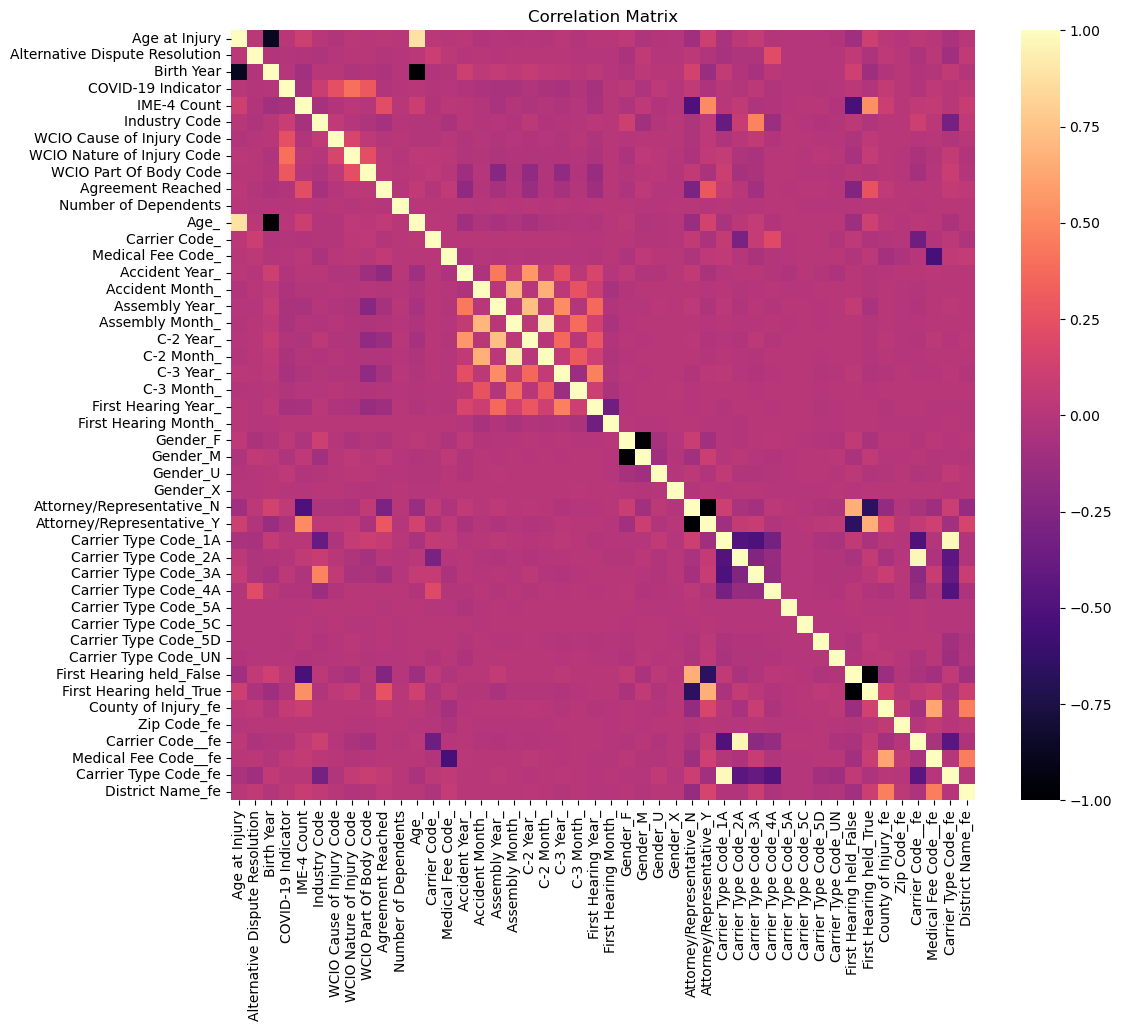

In [24]:

corr_matrix = df_train[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

### entropy based correlation

In [178]:
def entropy (feature):
    return -np.sum([p*np.log2(p) for p in feature.value_counts(normalize=True)])

In [179]:
def entropy_corr (df, n_iter = 30, n_frac = 0.5):
    
    entropy_matrix = []
    for col in df.columns:
        s = entropy(df[col])
        delta_entropy = []
        for i in range (n_iter):
            x = df[col].sample(frac=n_frac, random_state=i)
            delta_entropy.append(s - entropy(x) / s)
        entropy_matrix.append(delta_entropy)
    entropy_matrix = pd.DataFrame(entropy_matrix, index=df.columns)
    return entropy_matrix.T.corr()

In [181]:
entropy_corr_matrix = entropy_corr(df_train[num_cols])

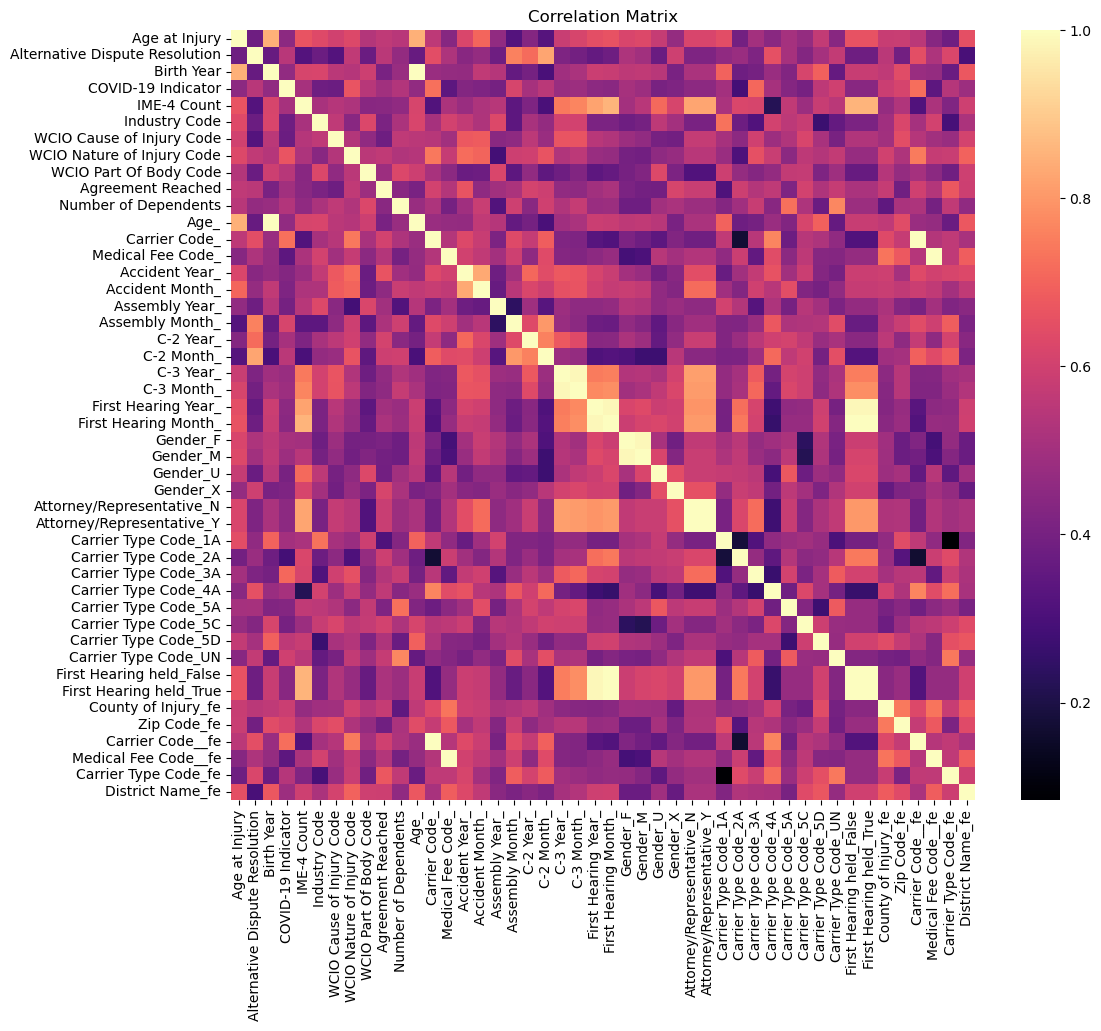

In [183]:
plt.figure(figsize=(12, 10))
sns.heatmap((entropy_corr_matrix + 1)/2, annot=False, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

### recursive function for classification based on mutual correlation

this function classifies the features based on their mutual correlation. Once the most ocorrelated features are found, the function removes it and repeats the process until the correlation.

I'm not a big fan of this methd but let's see

In [277]:
## let's make a function to do this
def classify_correlated_feature_maxmin(df, report = False, method = 'linear',elbow = False) -> pd.DataFrame:
    features = []
    score = []
    df_corr_search = df.copy()
    
    if (method == 'linear') | (method == 'spearman') | (method == 'l'):
        for i in range(df_corr_search.shape[1]):
            corr_matrix = df_corr_search.corr()
            #set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['max'] = abs(corr_matrix).max(axis=1)
            feature_to_drop = corr_matrix['max'].idxmax()
            score.append(corr_matrix['max'].max())
            features.append(feature_to_drop)
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])
    elif (method == 'entropy') | (method == 'e') | (method == 'max') | (method == 's'):
        print("the interpretation of this one should be done with caution")
        for i in range(df_corr_search.shape[1]):
            corr_matrix = (entropy_corr(df_corr_search) +1)/2
            #set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['max'] = abs(corr_matrix).max(axis=1)
            feature_to_drop = corr_matrix['max'].idxmax()
            score.append(corr_matrix['max'].max())
            features.append(feature_to_drop)
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])

    else: 
        print("method not recognized")
        return
    
    correlation_feature_scores = pd.DataFrame({'feature': features, 'score': score}) 
    correlation_feature_scores['d1'] = correlation_feature_scores['score'].diff()
    correlation_feature_scores['d2'] = correlation_feature_scores['d1'].diff()
    elbow_value = correlation_feature_scores['d2'][:-2].idxmax()
    if report:
        plt.figure(figsize=(12, 10))
        plt.plot(correlation_feature_scores['score'], label='score')
        plt.plot(correlation_feature_scores['d1'], label='d1')
        plt.plot(correlation_feature_scores['d2'], label='d2')
        plt.axvline(elbow_value, color='r', linestyle='--', label='elbow')
        plt.legend()
        plt.show()
    if elbow:
        return correlation_feature_scores[['feature','score']][:elbow_value], correlation_feature_scores[['feature','score']][elbow:] 
    return_df = correlation_feature_scores[['feature','score']]
    return_df = pd.DataFrame({'feature': features, 'score': score}, index=features)
    return_df.drop(columns=['feature'], inplace=True)
    return return_df

df_x = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='entropy', elbow=False)

the interpretation of this one should be done with caution


In [ ]:
## let's make a function to do this
def classify_correlated_features (df, report = False, method = 'linear', elbow = False) -> pd.DataFrame:
    features = []
    score = []
    df_corr_search = df.copy()
    
    if (method == 'linear') | (method == 'spearman') | (method == 'l'):
        for i in range(df_corr_search.shape[1]):
            corr_matrix = df_corr_search.corr()
            #set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['avg'] = abs(corr_matrix).mean(axis=1)
            corr_matrix = corr_matrix.sort_values(by='avg', ascending=False)
            feature_to_drop = corr_matrix.index[0]
            features.append(feature_to_drop)
            score.append(corr_matrix['avg'].iloc[0])
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])
    elif (method == 'entropy') | (method == 'e') | (method == 'ent') | (method == 's'):
        print("the interpretation of this one should be done with caution")
        for i in range(df_corr_search.shape[1]):
            corr_matrix = (entropy_corr(df_corr_search) +1)/2
            #set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['avg'] = abs(corr_matrix).mean(axis=1)
            corr_matrix = corr_matrix.sort_values(by='avg', ascending=False)
            feature_to_drop = corr_matrix.index[0]
            features.append(feature_to_drop)
            score.append(corr_matrix['avg'].iloc[0])
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])

    else: 
        print("method not recognized")
        return
    
    correlation_feature_scores = pd.DataFrame({'feature': features, 'score': score}) 
    correlation_feature_scores['d1'] = correlation_feature_scores['score'].diff()
    correlation_feature_scores['d2'] = correlation_feature_scores['d1'].diff()
    elbow = correlation_feature_scores['d2'][:-2].idxmax()
    if report:
        plt.figure(figsize=(12, 10))
        plt.plot(correlation_feature_scores['score'], label='score')
        plt.plot(correlation_feature_scores['d1'], label='d1')
        plt.plot(correlation_feature_scores['d2'], label='d2')
        plt.axvline(elbow, color='r', linestyle='--', label='elbow')
        plt.legend()
        plt.show()
    if elbow:
        return correlation_feature_scores[['feature','score']][:elbow], correlation_feature_scores[['feature','score']][elbow:] 
    return_df = correlation_feature_scores[['feature','score']]
    return_df = pd.DataFrame({'feature': features, 'score': score}, index=features)
    return_df.drop(columns=['feature'], inplace=True)
    return return_df

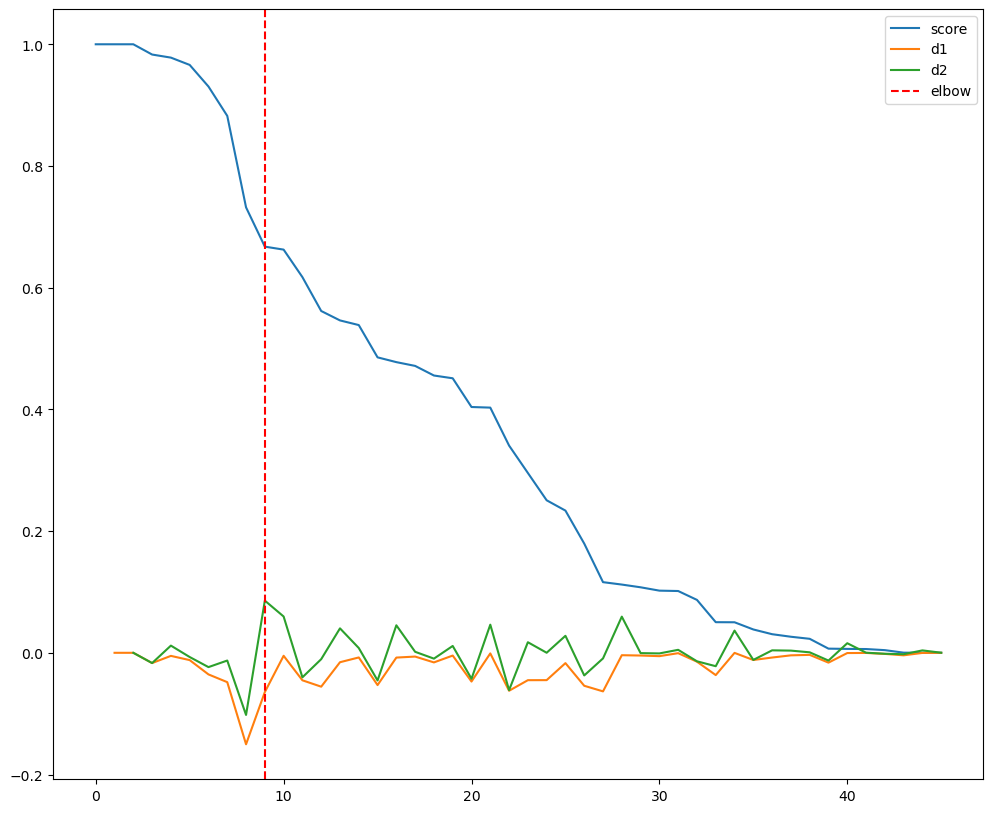

In [ ]:
x = classify_correlated_feature_maxmin(df_train[num_cols], report=True)

the interpretation of this one should be done with caution


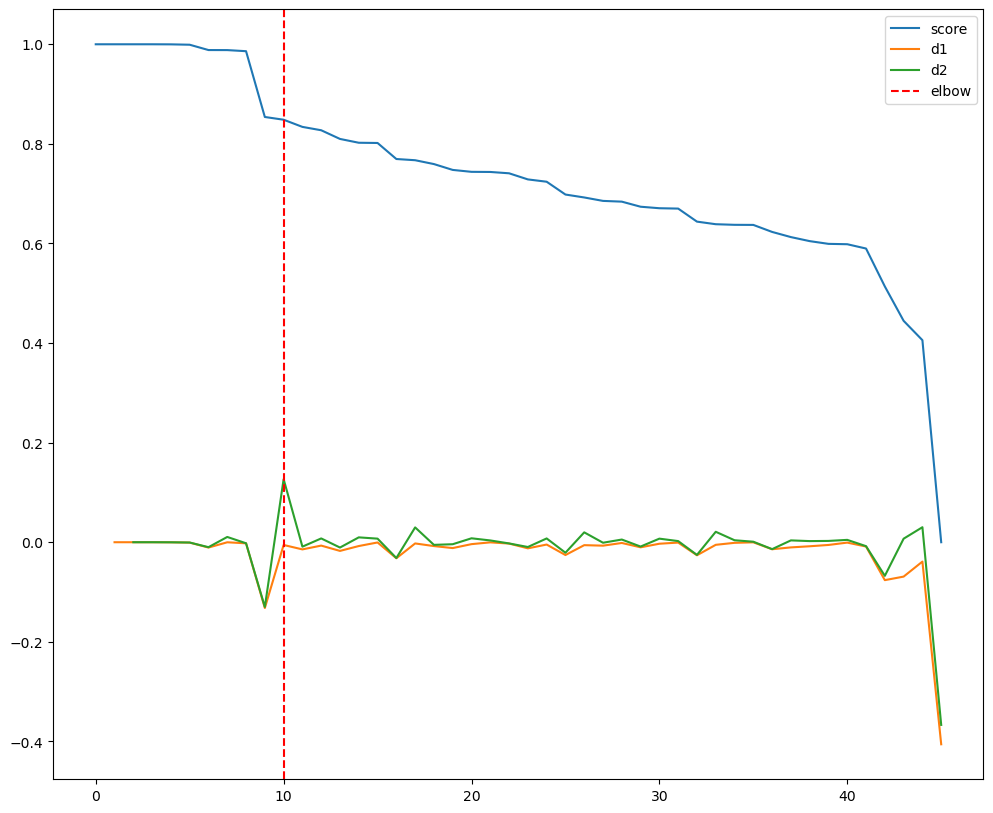

(                     feature     score
 0                 Birth Year  1.000000
 1          Medical Fee Code_  1.000000
 2  Attorney/Representative_N  1.000000
 3   First Hearing held_False  1.000000
 4       First Hearing Month_  0.999844
 5              Carrier Code_  0.999100
 6                   Gender_F  0.988408
 7                  C-3 Year_  0.988309
 8        First Hearing Year_  0.986113
 9                IME-4 Count  0.853993,
                            feature     score
 10                   Age at Injury  0.848487
 11                  Accident Year_  0.834093
 12  Alternative Dispute Resolution  0.827335
 13                      C-3 Month_  0.809903
 14       Attorney/Representative_Y  0.802246
 15                 Assembly Month_  0.801785
 16            Number of Dependents  0.769586
 17            Carrier Type Code_4A  0.767157
 18                       C-2 Year_  0.759429
 19      WCIO Nature of Injury Code  0.747685
 20             County of Injury_fe  0.743838
 21    

In [224]:
classify_correlated_feature_maxmin(df_train[num_cols], report=True, method='entropy')

## correlation with target 

### entropy based correlation

In [171]:
def two_col_entropy_corr (f1, f2, n_iter = 30, n_frac = 0.5):
    baseline_s_x1 = entropy(f1)
    baseline_s_x2 = entropy(f2)
    
    s_x1 = []
    s_x2 = []
    for i in range(n_iter):
        x1 = f1.sample(frac=0.9, random_state=i)
        x2 = f2.sample(frac=0.9, random_state=i)
        s_x1.append(baseline_s_x1 - entropy(x1)/baseline_s_x1)
        s_x2.append(baseline_s_x2 - entropy(x2)/baseline_s_x2)
    return np.corrcoef(s_x1, s_x2) [0,1]
        

### Chi-Square for categorical data

In [ ]:
from scipy.stats import chi2_contingency

In [319]:
prep1.get_code_features()

['Zip Code', 'Carrier Code_', 'Medical Fee Code_', 'Carrier Type Code']

In [ ]:
df_train_cat = df_train[['Alternative Dispute Resolution',
       'COVID-19 Indicator',
       'IME-4 Count', 'Number of Dependents', 'Accident Year_', 'Accident Month_',
       'Assembly Year_', 'Assembly Month_', 'C-2 Year_', 'C-2 Month_',
       'C-3 Year_', 'C-3 Month_', 'First Hearing Year_','Agreement Reached'
       'First Hearing Month_', 'Gender_F', 'Gender_M', 'Gender_U', 'Gender_X',
       'Attorney/Representative_N', 'Attorney/Representative_Y',
       'Carrier Type Code_1A', 'Carrier Type Code_2A', 'Carrier Type Code_3A',
       'Carrier Type Code_4A', 'Carrier Type Code_5A', 'Carrier Type Code_5C',
       'Carrier Type Code_5D', 'Carrier Type Code_UN',
       'First Hearing held_False', 'First Hearing held_True',
       'County of Injury_fe', 'Zip Code_fe', 'Carrier Code__fe',
       'Medical Fee Code__fe', 'Carrier Type Code_fe', 'District Name_fe']]

In [174]:
def chi2_feature_importance(f1, target, significance_level=0.05, log = False): 
    """
    Evaluate if a feature is important to predict the target using the Chi-squared test.

    Parameters:
        data (pd.DataFrame): The dataset containing the feature and target.
        feature (str): The name of the feature column.
        target (str): The name of the target column.
        significance_level (float): The threshold for statistical significance (default 0.05).

    Returns:
        dict: A dictionary containing the chi-squared statistic, p-value, and whether the feature is important.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(f1, target)
    
    # Perform the Chi-squared test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    total_observations = contingency_table.sum().sum()
    rows, cols = contingency_table.shape
    
    cramers_v = np.sqrt(chi2_stat / (total_observations * min(cols - 1, rows - 1)))
    
    is_important = p_value < significance_level
    
    if log:
        if cramers_v < 0.3:
            print(f" {is_important} the test is not significant {cramers_v}")
        elif cramers_v < 0.5:
            print(f" {is_important} the test is weakly significant {cramers_v}")
        elif cramers_v < 0.7:
            print(f" {is_important} the test is moderately significant {cramers_v}")
        elif cramers_v < 1:
            print(f" {is_important} the test is highly significant {cramers_v}")
        else:
            print(f"the test has no sense {cramers_v}")
    
    # Determine if the feature is important
    is_important = p_value < significance_level
    return cramers_v, p_value
    

### function for classification based on correlation with target

In [ ]:
# sigmoid function
def sigmoid(x, a = 20):
    return 1 / (1 + np.exp(-a * (x - 0.5)))


In [ ]:
def classify_correlation_w_target(f1, target, significance_level=0.05, log = False, method = 'chi2', parameter_sigmoid = 20):
    
    if method == 'chi2':
        cramers_v, p_value = chi2_feature_importance(f1, target, significance_level, log)
        score = (1 - p_value)*sigmoid(cramers_v, a = parameter_sigmoid)
        
    elif method == 'entropy' or method == 'ent' or method == 'e' or method == 's':
        score = (two_col_entropy_corr (f1, target) + 1) / 2
        
    elif method == 'linear' or method == 'spearman' or method == 'l':
        score = np.abs(f1.corr(target))
    
    elif method == 'all':
        cramers_v, p_value = chi2_feature_importance(f1, target, significance_level, log)
        try:    
            score1 = (1 - p_value)*sigmoid(cramers_v, a = parameter_sigmoid)
        except:
            score1 = np.nan
        try:
            score2 = (two_col_entropy_corr(f1, target) + 1) / 2
        except:
            score2 = np.nan
        try:
            score3 = np.abs(f1.corr(target))
        except:
            score3 = np.nan
        return score1, score2, score3
    
    return score

        
        
        
        


In [285]:
for var in df_dummies:
    print(classify_correlation_w_target(df_train[var], y_train, log = False, method = 'linear'))

0.07005327908240502
0.07605926647612125
0.08129645433738732
0.029980591842719086
0.0005086840969615146
0.5801247272561622
0.5801247272561622
0.08601909482205328
0.09192014639913113
0.048558329356012384
0.03710205418619301
0.003525764113759501
0.0009118713292800206
0.0038565481907279946
0.04701967173612361
0.525758140180751
0.525758140180751


In [153]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 459220 entries, 5877274 to 5803696
Series name: Claim Injury Type
Non-Null Count   Dtype
--------------   -----
459220 non-null  int64
dtypes: int64(1)
memory usage: 23.1 MB


In [306]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 5877274 to 5803696
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   459220 non-null  float64
 1   Alternative Dispute Resolution  459220 non-null  float64
 2   Birth Year                      459220 non-null  float64
 3   County of Injury                459220 non-null  object 
 4   COVID-19 Indicator              459220 non-null  int64  
 5   District Name                   459220 non-null  object 
 6   IME-4 Count                     459220 non-null  float64
 7   Industry Code                   459220 non-null  float64
 8   WCIO Cause of Injury Code       459220 non-null  float64
 9   WCIO Nature of Injury Code      459220 non-null  float64
 10  WCIO Part Of Body Code          459220 non-null  float64
 11  Zip Code                        459220 non-null  object 
 12  Agreement Reac

In [312]:
#create a dataframe with the correlation scores
corr_scores = pd.DataFrame()
for var in df_train_cat.columns:
    print(var)
    s1,s2,s3 = classify_correlation_w_target(df_train[var], y_train, method='all') 
    corr_scores[var] = [s1, s2, s3]

corr_scores = corr_scores.T
corr_scores.columns = ['chi2_y', 'entropy_y', 'linear_y']
# name teh index column
corr_scores.index.name = 'feature'
lin_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='linear')
lin_corr_df.columns = ['linear_x']
s_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='entropy',elbow=False)
s_corr_df.columns = ['entropy_x']

feature_selection = pd.concat([lin_corr_df, s_corr_df, corr_scores], axis=1)

Alternative Dispute Resolution
COVID-19 Indicator
IME-4 Count
Number of Dependents
Accident Year_
Accident Month_
Assembly Year_
Assembly Month_
C-2 Year_
C-2 Month_
C-3 Year_
C-3 Month_
First Hearing Year_
First Hearing Month_
Gender_F
Gender_M
Gender_U
Gender_X
Attorney/Representative_N
Attorney/Representative_Y
Carrier Type Code_1A
Carrier Type Code_2A
Carrier Type Code_3A
Carrier Type Code_4A
Carrier Type Code_5A
Carrier Type Code_5C
Carrier Type Code_5D
Carrier Type Code_UN
First Hearing held_False
First Hearing held_True
County of Injury_fe
Zip Code_fe
Carrier Code__fe
Medical Fee Code__fe
Carrier Type Code_fe
District Name_fe
the interpretation of this one should be done with caution


In [316]:
df_train['Agreement Reached'].value_counts()

Agreement Reached
0.0    437836
1.0     21384
Name: count, dtype: int64

In [313]:
feature_selection

,linear_x,entropy_x,chi2_y,entropy_y,linear_y
Attorney/Representative_N,1.000000,1.000000,0.902102,0.754632,0.580125
First Hearing held_False,1.000000,1.000000,0.696337,0.772911,0.525758
Birth Year,1.000000,1.000000,NaN,NaN,NaN
Gender_F,0.983132,0.988408,0.000281,0.370717,0.076059
Carrier Type Code_1A,0.978076,0.638646,0.000395,0.504557,0.086019
Carrier Type Code_2A,0.966078,0.743580,0.000495,0.589822,0.091920
Assembly Month_,0.930568,0.801785,0.000062,0.741307,0.021641
Age at Injury,0.882340,0.848487,NaN,NaN,NaN
Assembly Year_,0.732015,0.444641,0.000198,0.378347,0.063589
Accident Month_,0.667464,0.643843,0.000173,0.681488,0.018959


In [196]:
# cluster corr_scores
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(corr_scores[['entropy','chi2']])
corr_scores['cluster'] = kmeans.labels_

corr_scores

,chi2,entropy,linear,cluster
COVID-19 Indicator,0.000331,0.447812,-0.070053,0
Gender_F,0.000281,0.370717,-0.076059,0
Gender_M,0.000305,0.315576,0.081296,0
Gender_U,0.000084,0.234454,-0.029981,0
Gender_X,0.000055,0.565630,0.000509,0
Attorney/Representative_N,0.902102,0.754632,-0.580125,1
Attorney/Representative_Y,0.902102,0.754632,0.580125,1
Carrier Type Code_1A,0.000395,0.504557,-0.086019,0
Carrier Type Code_2A,0.000495,0.589822,0.091920,0
Carrier Type Code_3A,0.000731,0.624802,0.048558,0


In [166]:
two_col_entropy_corr (df_train['COVID-19 Indicator'], y_train)

np.float64(-0.10437639029985293)

In [ ]:
def feature_selection (df, target):
    corr_scores = pd.DataFrame()
    for var in df_dummies:
        print(var)
        s1,s2,s3 = classify_correlation_w_target(df_train[var], y_train, method='all') 
        corr_scores[var] = [s1, s2, s3]

    corr_scores.index = ['chi2', 'entropy', 'linear']
    corr_scores = corr_scores.T

In [321]:
train['WCIO Nature of Injury Code']

Claim Identifier
5393875    10.0
5393091    49.0
5393889     7.0
5393887    43.0
5393863    10.0
           ... 
6165265    10.0
6165285    37.0
6165506    80.0
6165339    59.0
6165075    90.0
Name: WCIO Nature of Injury Code, Length: 574026, dtype: float64

In [291]:
pd.concat([lin_corr_df, s_corr_df, corr_scores,feature_importances], axis=1)

,entropy,score,chi2,entropy,linear,0
Attorney/Representative_N,1.000000,1.000000,0.902102,0.754632,-0.580125,3.436933e-02
First Hearing held_False,1.000000,1.000000,0.696337,0.772911,-0.525758,1.366845e-02
Birth Year,1.000000,1.000000,NaN,NaN,NaN,4.279243e-02
Gender_F,0.983132,0.988408,0.000281,0.370717,-0.076059,6.362015e-03
Carrier Type Code_1A,0.978076,0.638646,0.000395,0.504557,-0.086019,3.922386e-03
Carrier Type Code_2A,0.966078,0.743580,0.000495,0.589822,0.091920,3.134226e-03
Assembly Month_,0.930568,0.801785,NaN,NaN,NaN,3.106547e-02
Age at Injury,0.882340,0.848487,NaN,NaN,NaN,4.790344e-02
Assembly Year_,0.732015,0.444641,NaN,NaN,NaN,9.541592e-03
Accident Month_,0.667464,0.643843,NaN,NaN,NaN,3.355700e-02


## random forest feature importance

In [ ]:
feature_importances.columns = ['fi_RandomForestClassifier']

Accuracy:  0.690103304705329


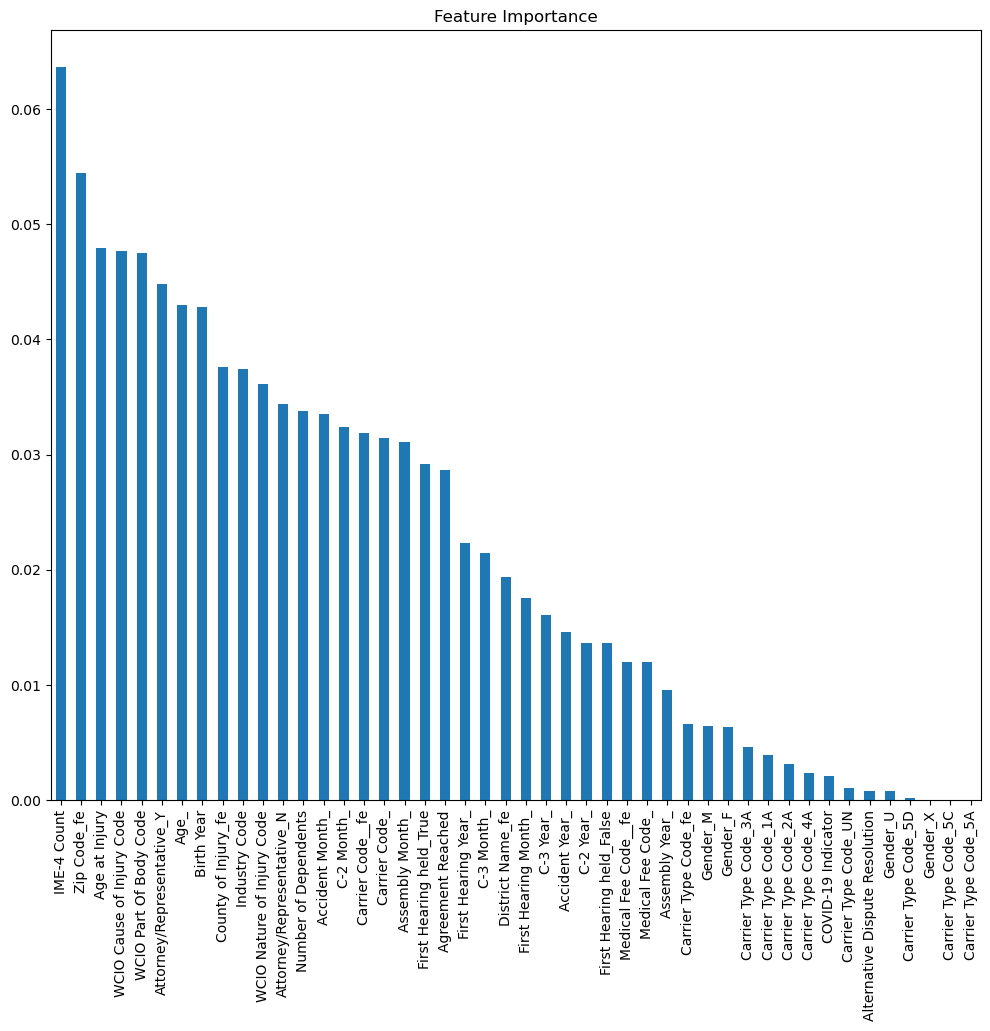

In [ ]:
#classify the features fro most useful to least useful
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(df_train[num_cols], y_train)
y_pred = clf.predict(df_valid[num_cols])
print('Accuracy: ', accuracy_score(y_valid, y_pred))

# get the feature importance
feature_importances = clf.feature_importances_
feature_importances = pd.Series(feature_importances, index=df_train[num_cols].columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances.columns = ['fi_RandomForestClassifier']
plt.figure(figsize=(12, 10))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()



In [292]:
feature_importances*10

IME-4 Count                       0.636556
Zip Code_fe                       0.544771
Age at Injury                     0.479034
WCIO Cause of Injury Code         0.476870
WCIO Part Of Body Code            0.474815
Attorney/Representative_Y         0.447876
Age_                              0.429665
Birth Year                        0.427924
County of Injury_fe               0.375988
Industry Code                     0.374038
WCIO Nature of Injury Code        0.360914
Attorney/Representative_N         0.343693
Number of Dependents              0.338029
Accident Month_                   0.335570
C-2 Month_                        0.324316
Carrier Code__fe                  0.319194
Carrier Code_                     0.314412
Assembly Month_                   0.310655
First Hearing held_True           0.292318
Agreement Reached                 0.286622
First Hearing Year_               0.223212
C-3 Month_                        0.214515
District Name_fe                  0.193905
First Heari

In [ ]:
#create a dataframe with the correlation scores
corr_scores = pd.DataFrame()
for var in df_dummies:
    print(var)
    s1,s2,s3 = classify_correlation_w_target(df_train[var], y_train, method='all') 
    corr_scores[var] = [s1, s2, s3]

corr_scores = corr_scores.T
corr_scores.columns = ['chi2_y', 'entropy_y', 'linear_y']
# name teh index column
corr_scores.index.name = 'feature'
lin_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='linear')
lin_corr_df.columns = ['linear_x']
s_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='entropy',elbow=False)
s_corr_df.columns = ['entropy_x']



feature_selection = pd.concat([lin_corr_df, s_corr_df, corr_scores], axis=1)

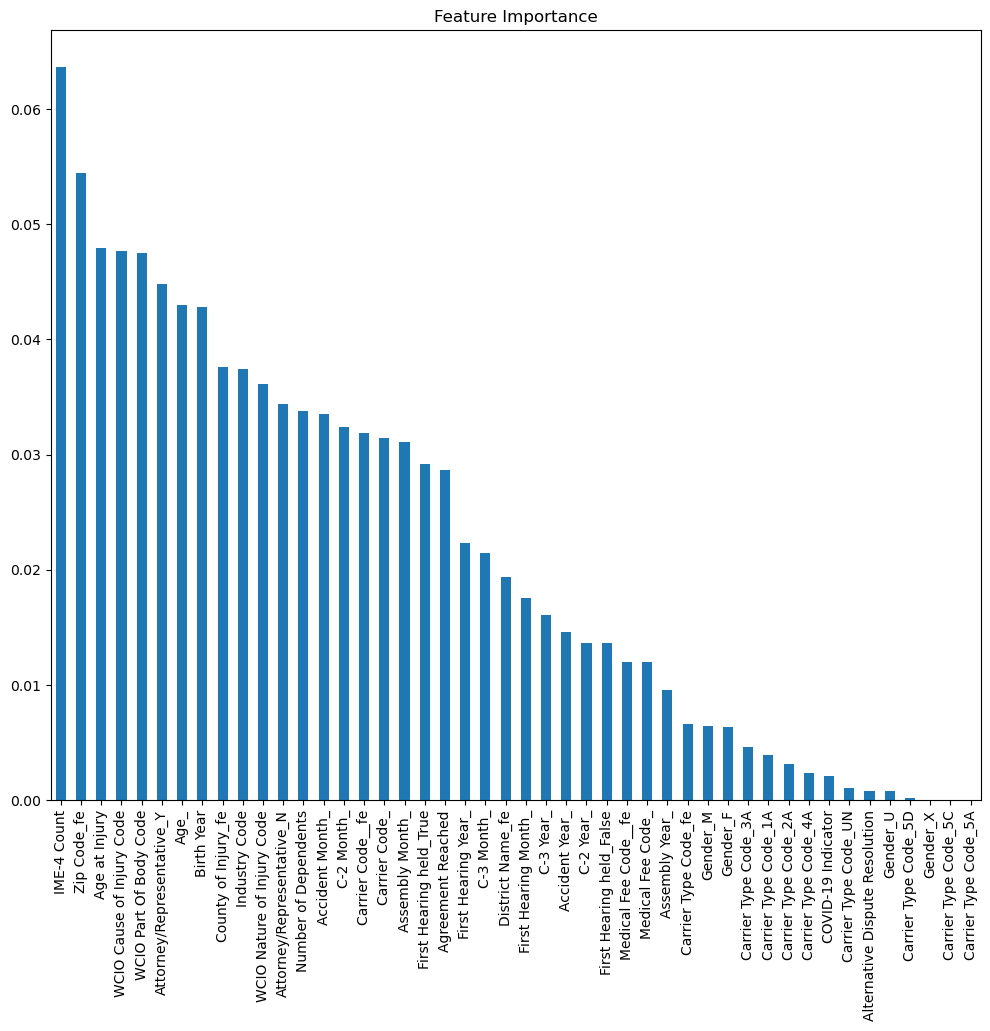

In [288]:
feature_importances = pd.Series(feature_importances, index=df_train[num_cols].columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


## RFE

In [295]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
num_cols
rfe = RFE(estimator=model, n_features_to_select=4)
rfe.fit(df_train[num_cols], y_train)


RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [298]:
rfe_cols = df_train[num_cols].columns[rfe.support_]

In [ ]:
df_train[num_cols].columns[rfe.support_]

Index(['Age at Injury', 'IME-4 Count', 'Zip Code_fe', 'Carrier Code__fe'], dtype='object')

In [299]:
from sklearn.metrics import accuracy_score

model.fit(df_train[rfe_cols], y_train)
y_pred = model.predict(df_valid[rfe_cols])
accuracy_score(y_valid, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.10      0.04      0.06      2538
           2       0.64      0.78      0.70     57977
           3       0.12      0.06      0.08     13780
           4       0.42      0.43      0.43     29822
           5       0.26      0.16      0.20      9693
           6       0.04      0.01      0.01       889
           7       0.00      0.00      0.00        11
           8       0.02      0.01      0.01        96

    accuracy                           0.53    114806
   macro avg       0.20      0.19      0.19    114806
weighted avg       0.47      0.53      0.49    114806



## columns chosen by our methods 

# Representation problem

## add noise to the data

In [ ]:
def generate_synthetic_data_from_existing(existing_data, noise_level=0.1, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Add Gaussian noise to each feature in the existing data
    synthetic_data = existing_data.copy()
    for column in synthetic_data.columns:
        noise = np.random.normal(0, noise_level, size=synthetic_data[column].shape)
        synthetic_data[column] += noise
    
    return synthetic_data

# Example usage
# Assuming `existing_data` is a DataFrame with your existing data
existing_data = pd.DataFrame({
    'f1': np.random.rand(100),
    'f2': np.random.rand(100),
    'target': np.random.rand(100)
})

synthetic_data = generate_synthetic_data_from_existing(existing_data, noise_level=0.1, random_state=42)
print(synthetic_data.head())

In [ ]:
# generate synthetic 

In [ ]:
def representation_treshold(len_y,unique_y):
    reurn (len_y/unique_y)-(m.sqrt(len_y/8 *100 )/100)

# try smote

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

def generate_synthetic_data_using_smote(existing_data, target_column, sampling_strategy='auto', random_state=None):
    # Separate features and target
    X = existing_data.drop(columns=[target_column])
    y = existing_data[target_column]
    
    # Apply SMOTE to generate synthetic data
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Combine resampled features and target into a DataFrame
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data[target_column] = y_resampled
    
    return resampled_data

# Example usage
# Assuming `existing_data` is a DataFrame with your existing data
existing_data = pd.DataFrame({
    'f1': np.random.rand(100),
    'f2': np.random.rand(100),
    'target': np.random.choice([0, 1], size=100, p=[0.9, 0.1])  # Imbalanced target
})

synthetic_data = generate_synthetic_data_using_smote(existing_data, target_column='target', random_state=42)
print(synthetic_data.head())